In [1]:
import numpy as np
import pandas as pd


In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv("crops.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
round(df.describe(),2)

,N,P,K,temperature,humidity,ph,rainfall
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,6.47,103.46
std,36.92,32.99,50.65,5.06,22.26,0.77,54.96
min,0.00,5.00,5.00,8.83,14.26,3.50,20.21
25%,21.00,28.00,20.00,22.77,60.26,5.97,64.55
50%,37.00,51.00,32.00,25.60,80.47,6.43,94.87
75%,84.25,68.00,49.00,28.56,89.95,6.92,124.27
max,140.00,145.00,205.00,43.68,99.98,9.94,298.56


# EXPLORING DATA

In [9]:
correlation = df.corr()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

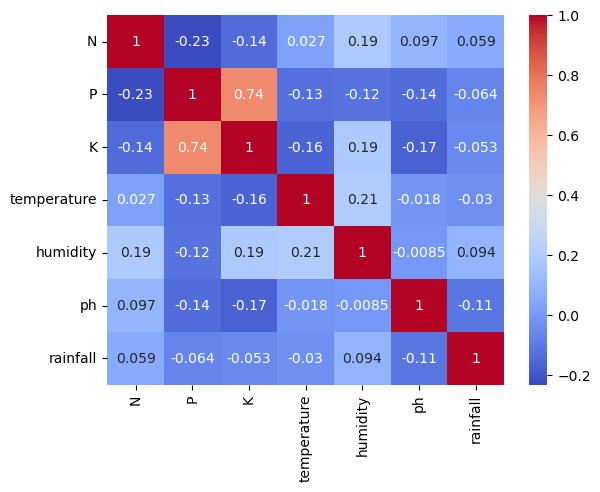

In [11]:
sns.heatmap(correlation,annot=True,cbar=True,cmap='coolwarm')

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

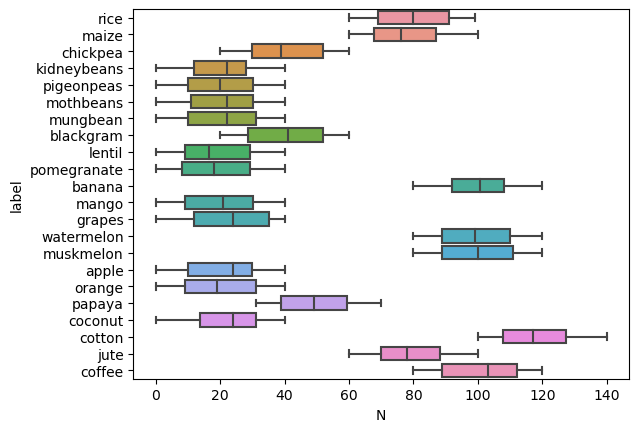

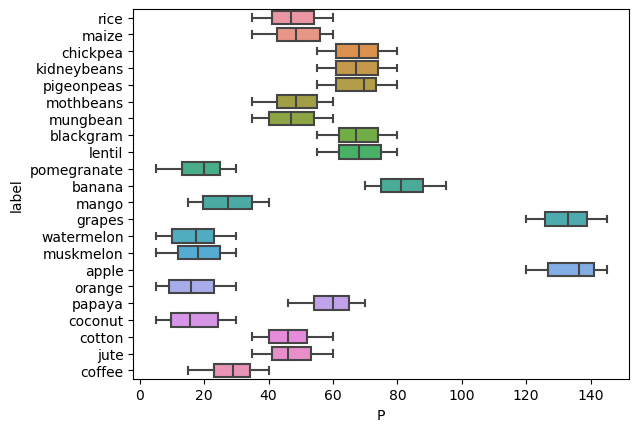

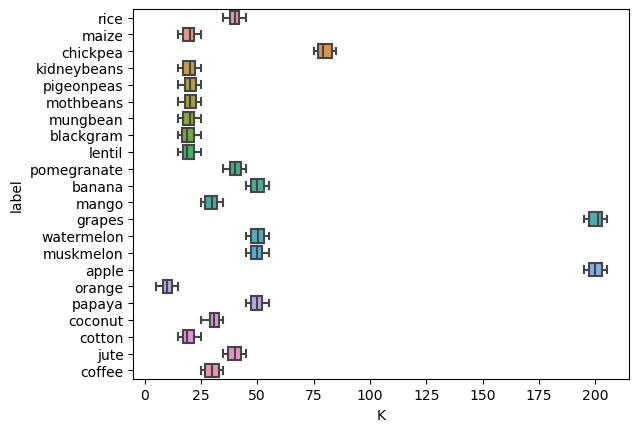

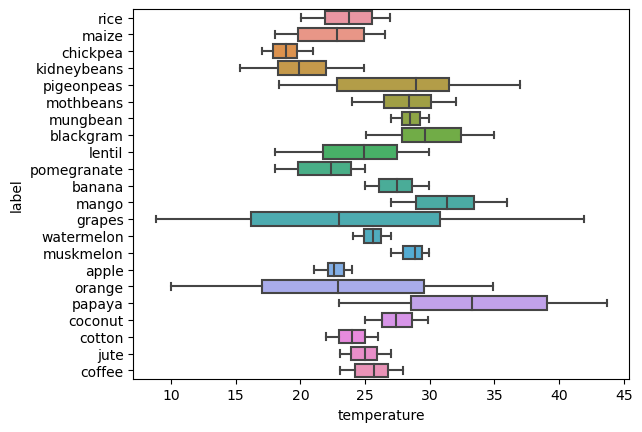

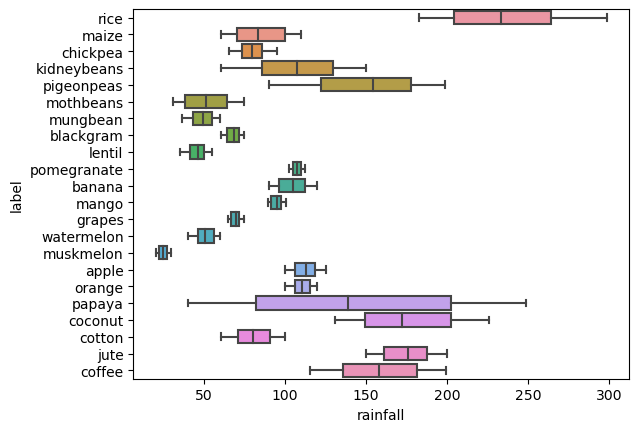

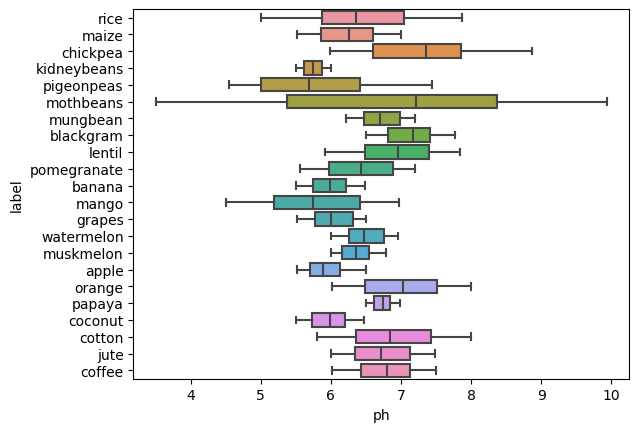

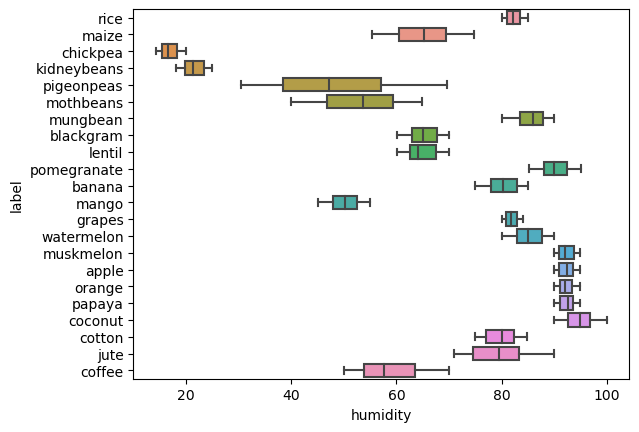

In [13]:
sns.boxplot(x='N',y='label', data = df)
plt.show()
sns.boxplot(x='P',y='label', data = df)
plt.show()
sns.boxplot(x='K',y='label', data = df)
plt.show()
sns.boxplot(x='temperature',y='label', data = df)
plt.show()
sns.boxplot(x='rainfall',y='label', data = df)
plt.show()
sns.boxplot(x='ph',y='label', data = df)
plt.show()
sns.boxplot(x='humidity',y='label', data = df)
plt.show()

<Axes: >

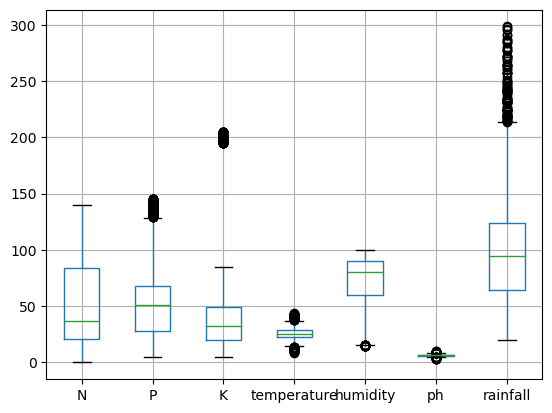

In [14]:
df.boxplot()

***from above graphs we can say that graphes can grow over long range of temperature but its average temperature is not that much , Papaya can grown over land where rain variation is high but Rice require high average rainfall.Chickpea require less humidity otherwise insects will attaack it***  

# Assigning the variables 

In [15]:
y = df['label']
X = df.iloc[:,:-1]

In [16]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

# Train and Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .20,random_state =42)

# Training  Models  

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [20]:
#instances of all models
models = {
    'Logistic Regression':LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging':BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting':GradientBoostingClassifier()
}

In [21]:
for name,md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f'{name} : {accuracy_score(y_test,ypred)}')

Logistic Regression : 0.9454545454545454
Support Vector Machine : 0.9613636363636363
K-Nearest Neighbors : 0.9704545454545455
Random Forest : 0.9931818181818182
Bagging : 0.990909090909091
AdaBoost : 0.09545454545454546
Gradient Boosting : 0.9818181818181818


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
for name,md in models.items():
    score = cross_val_score(md,X,y,cv=5,scoring='accuracy').mean()
    
    print(f'{name} : {score}')

Logistic Regression : 0.9550000000000001
Support Vector Machine : 0.9781818181818182
K-Nearest Neighbors : 0.9795454545454545
Random Forest : 0.9936363636363638
Bagging : 0.9881818181818183
AdaBoost : 0.2
Gradient Boosting : 0.990909090909091


# Random Forest 

In [24]:
rfc= RandomForestClassifier()

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = rfc.predict(X_test)

In [27]:
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [28]:
accuracy_score(y_test,y_pred)

0.9931818181818182

# GridSearchCV

In [29]:
#number of trees in random forest 
n_estimators = [20,40,60,80]


# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]



In [30]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 40, 60, 80], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [31]:
from sklearn.model_selection import GridSearchCV

rfc_grid = GridSearchCV(estimator = rfc, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [32]:
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 40, 60, 80]},
             verbose=2)

In [33]:
rfc_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 40}

In [34]:
rfc_grid.best_score_

0.9954545454545455

# Best Model 

In [35]:
rfc2 = RandomForestClassifier(max_depth= None,
 max_features=0.2,
 max_samples =1.0,
 n_estimators=40)

In [36]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(max_features=0.2, max_samples=1.0, n_estimators=40)

# Prediction System

In [37]:
def recommendation(N, P,K,temperature,humidity,ph, rainfall):
    input_data = np.array([[N, P,K,temperature,humidity,ph, rainfall]])
    prediction = rfc2.predict(input_data)
    
    print(prediction)

In [38]:
N=10
P=13
K=14
temperature=10
humidity=100
ph=1
rainfall=104

predict = recommendation(N, P,K,temperature,humidity,ph, rainfall)
#print(predict)

['orange']


In [39]:
import joblib 
file_name = 'crop_app'
joblib.dump(rfc2,'crop_app')
app = joblib.load('crop_app')
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)

In [40]:
acc[0]

'rice'